Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Load Dataset

In [3]:
df = pd.read_excel("walmart.xlsx")
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Customer Name  3203 non-null   object        
 4   Country        3203 non-null   object        
 5   City           3203 non-null   object        
 6   State          3203 non-null   object        
 7   Category       3203 non-null   object        
 8   Product Name   3203 non-null   object        
 9   Sales          3203 non-null   float64       
 10  Quantity       3203 non-null   int64         
 11  Profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 300.4+ KB


,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493233,3.828910,33.849032
std,524.876877,2.260947,174.109081
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.852000
50%,60.840000,3.000000,11.166400
75%,215.809000,5.000000,33.000400
max,13999.960000,14.000000,6719.980800


Data Handling

In [7]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit'],
      dtype='object')

Date Handling

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Week'] = df['Order Date'].dt.isocalendar().week

Target & Features

We will predict: Weekly_Sales

In [9]:
# Target variable
y = df['Sales']

# Feature columns
features = [
    'Quantity',
    'Profit',
    'Year',
    'Month',
    'Week'
]

X = df[features]


In [10]:
X

,Quantity,Profit,Year,Month,Week
0,2,6.8714,2013,6,24
1,7,14.1694,2011,6,23
2,4,1.9656,2011,6,23
3,4,90.7152,2011,6,23
4,3,5.7825,2011,6,23
...,...,...,...,...,...
3198,1,15.2208,2013,9,40
3199,2,15.6332,2014,2,9
3200,2,19.3932,2014,2,9
3201,4,13.3200,2014,2,9


In [12]:
y

0        14.620
1        48.860
2         7.280
3       907.152
4        18.504
         ...   
3198     36.240
3199     91.960
3200    258.576
3201     29.600
3202    243.160
Name: Sales, Length: 3203, dtype: float64

Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Train Model

In [14]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

Evaluation

In [15]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 145.97859230109196
RMSE: 499.2859187346381


Visualization

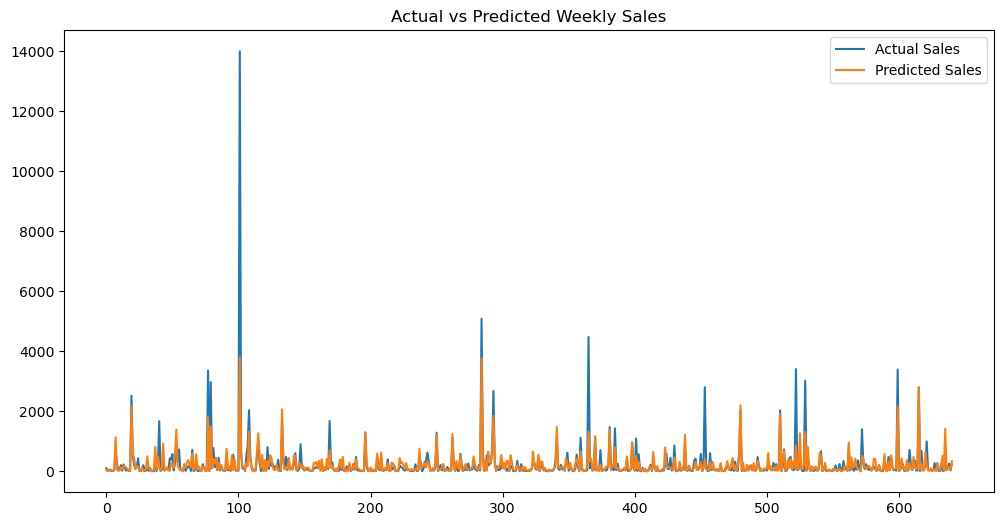

In [16]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(predictions, label="Predicted Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()


Business Insight Cell 

# Sales Forecasting & Demand Prediction System

This project predicts future retail sales using historical Walmart data and machine learning models.
It supports:
- Inventory planning
- Demand forecasting
- Seasonal trend detection
- Data-driven business decisions

Model Used: Random Forest Regressor  
Evaluation Metrics: MAE, RMSE  